<a href="https://colab.research.google.com/github/aplibranza/Predicting-Food-Delivery-Time---Hackathon-by-IMS-Proschool/blob/master/DATA101_Data_Visualization_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA101 - Data Visualization Lab
Author: Alexander Ken Libranza

Department of Software Technology, De La Salle University


## **Table of Contents**
1. Introduction
2. Dataset Overview
3. Data Preview & Preparation
4. Visualizing Tabular Data
* Scatter Plot
* Bar Chart
* Line Plot
* Heatmap
* Scatterplot Matrix (SPLOM)
* Parallel Coordinates
5. Interactive Visualizations with Plotly
6. Summary

## Introduction to Tabular Data
Tabular data is data arranged in rows and columns. Each row is a record (e.g., a Gcash transaction) and each column is a feature/attribute (e.g., amount, user region).

###Why visualize tabular data?

* To see patterns (trends, outliers)
* To compare categories
* To summarize large tables quickly

###In this notebook, you will:

* Generate a synthetic dataset of 500 "Gcash transactions"
* Visualize it using Scatter Plot and Bar Chart
*  to draw basic insights from these plots

## Dataset Overview
We simulate a dataset with 500 rows, each row describing a Gcash transaction, including details like:

* transaction_id: Unique ID
* amount: Transaction amount (PHP)
* transaction_type: Send/Receive/Payment
* is_fraud: Is fraudulent?
* user_age: Age of user
* user_region: Region (NCR, Luzon, Visayas, Mindanao)
* day_of_week: Day of transaction
* hour: Hour of transaction
* traffic_level: Metro Manila traffic (Low/Medium/High)

##Data Preview & Preparation
**What will happen here?**
We'll create a virtual table of 500 Gcash transactions, with columns like amount, region, age, and fraud status.
You will use this same data for the rest of the notebook.

In [2]:
# Step-by-step data generation
import numpy as np
import pandas as pd

np.random.seed(42)  # Ensures reproducibility: everyone's data will be the same!

# Number of transactions
N = 500

# Create the synthetic dataset
df = pd.DataFrame({
    'transaction_id': np.arange(1, N+1),  # Unique ID for each transaction
    'amount': np.round(np.random.exponential(scale=2000, size=N), 2),  # Transaction amounts, mostly small, some large
    'transaction_type': np.random.choice(['Send', 'Receive', 'Payment'], N),  # 3 types of transactions
    'is_fraud': np.random.choice([0,1], N, p=[0.96, 0.04]),  # 4% are frauds
    'user_age': np.random.randint(18, 65, N),  # Age bucket of user
    'user_region': np.random.choice(
        ['NCR', 'Luzon', 'Visayas', 'Mindanao'],
        N, p=[0.5,0.2,0.15,0.15]),  # Where the user is based
})

# Preview the first few transactions
df.head(10)


,transaction_id,amount,transaction_type,is_fraud,user_age,user_region
0,1,938.54,Receive,0,59,NCR
1,2,6020.24,Payment,0,31,Visayas
2,3,2633.49,Send,0,28,Visayas
3,4,1825.89,Send,0,35,Visayas
4,5,339.25,Send,0,29,NCR
5,6,339.19,Send,0,40,NCR
6,7,119.68,Send,0,29,NCR
7,8,4022.46,Send,0,30,NCR
8,9,1838.16,Send,0,42,NCR
9,10,2462.50,Receive,0,62,Mindanao


**What to look for:**

*  row represents a Gcash transaction
* You can see the distribution of amount, type, user age, region
* Some transactions (is_fraud==1) are marked as fraudulent

#Scatter Plot & Bar Charts

## Scatter Plot: Visualizing Relationships
**What will happen here?**

Scatter plots let us compare two quantitative variables (numbers).
We'll plot user_age (x-axis) vs amount (y-axis), and color frauds in red.

**Why?**
* To see if certain age groups tend to have larger or smaller transactions
* To spot outliers (unusually high or low transactions)
* To check if frauds are clustered in any age or amount group

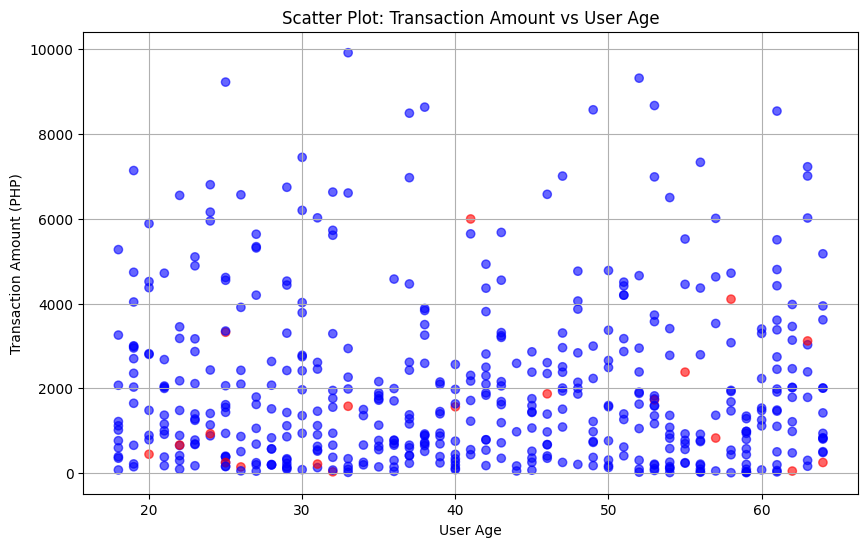

In [3]:
import matplotlib.pyplot as plt

# Map the colors: normal (is_fraud=0) are blue, fraud (is_fraud=1) are red
colors = df['is_fraud'].map({0:'blue', 1:'red'})

plt.figure(figsize=(10,6))
plt.scatter(df['user_age'], df['amount'], alpha=0.6, c=colors)
plt.xlabel('User Age')
plt.ylabel('Transaction Amount (PHP)')
plt.title('Scatter Plot: Transaction Amount vs User Age')
plt.grid(True)
plt.show()


**How to interpret this plot?**
* Blue dots: Normal transactions
* Red dots: Fraudulent transactions
* X axis: Age of the user
* Y axis: Amount transacted

**Insights you can draw:**
* Are higher amounts mostly carried by older or younger users?
* Are frauds (red) concentrated at certain amounts/ages?
* Are there outliers (e.g. a very large transaction by a young user)?
* What does "spread" look like—is it balanced, or do you see patterns?

**Try:**
* Mouse over the plot if interactive: Which transaction type is common at high amounts?
* Are frauds scattered or clustered?

## Bar Chart: Comparing Categories

**What will happen here?**

Bar charts help us compare counts or averages across categories.
We'll count the number of transactions per user region (user_region).

**Why?**
* To see which regions are most active
* To quickly compare categorical values

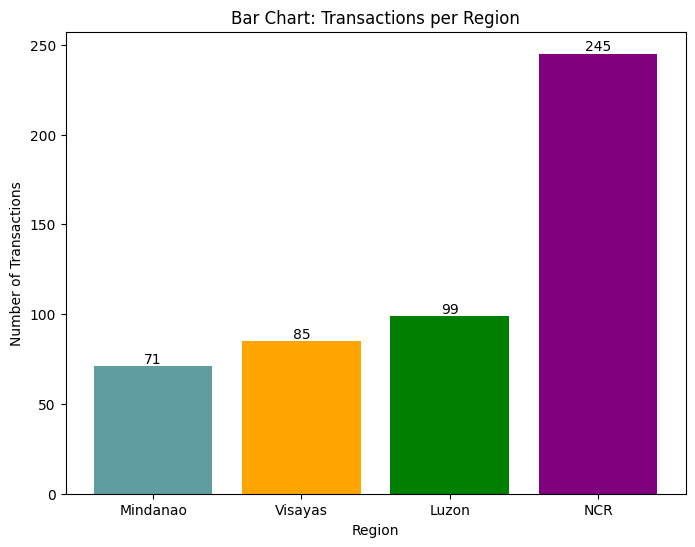

In [4]:
# Calculate the number of transactions per region
region_counts = df['user_region'].value_counts().sort_values()

plt.figure(figsize=(8,6))
bars = plt.bar(region_counts.index, region_counts.values, color=['cadetblue','orange','green','purple'])
plt.ylabel('Number of Transactions')
plt.xlabel('Region')
plt.title('Bar Chart: Transactions per Region')

# Add labels on top of bars for clarity
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        str(int(bar.get_height())),
        ha='center', va='bottom'
    )

plt.show()


**How to interpret this plot?**
* Each bar: A region
* Height of bar: How many transactions occurred there
* Colors: Assigned for visibility and to distinguish

**Insights you can draw:**
* Which region has the most transactions?
* Are some regions less active than others?
* Is NCR (Metro Manila) the busiest?
* Are Visayas/Mindanao transactions as expected, given population?

**Try:**
* Change region_counts to df.groupby('user_region')['amount'].mean() to see average amount per region!

In [7]:
# Calculate the average transaction amount per region
--- avg_amount_per_region = df.groupby('user_region')['amount'].mean().sort_values()

plt.figure(figsize=(8,6))
bars = plt.bar(avg_amount_per_region.index, avg_amount_per_region.values, color=['cadetblue','orange','green','purple'])
plt.ylabel('Average Transaction Amount (PHP)')
plt.xlabel('Region')
plt.title('Bar Chart: Average Transaction Amount per Region')

# Add labels on top of bars for clarity
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha='center', va='bottom'
    )

plt.show()

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (ipython-input-3224669355.py, line 2)

**Final Thoughts & Key Takeaways**

* Scatter plots are for showing relationships between two numerical columns, possibly highlighting categories using color.
* Outliers, clusters, and patterns are easily visible.
* Bar charts are for categorical variables; perfect for comparing counts or averages across groups.
* Quickly shows which categories (regions/types) dominate or lag.
* Visualization lets us turn thousands of numbers into immediate, actionable insights!

## **Exercise 1: Scatter Plot of Amount vs User Age, Colored by Transaction Type**
* Plot a scatter plot of amount vs user_age, colored by transaction_type
* What patterns do you see for Send, Receive, Payment?

**Step-by-step:**
1. We visualize the relationship between transaction amount (y-axis) and user age (x-axis).
2. Points will be colored by transaction_type to show patterns for Send, Receive, Payment.

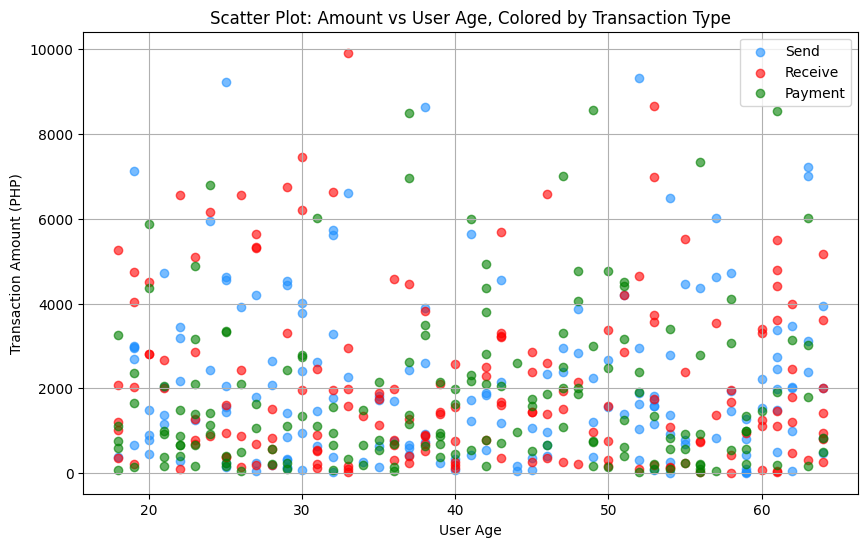

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Assign colors for each transaction type
type_colors = {'Send':'dodgerblue', 'Receive':'red', 'Payment':'green'}

for t_type, color in type_colors.items():
    # Only select rows for this transaction type
    selection = df[df['transaction_type'] == t_type]
    plt.scatter(
        selection['user_age'],
        selection['amount'],
        label=t_type,
        color=color,
        alpha=0.6
    )

plt.xlabel('User Age')
plt.ylabel('Transaction Amount (PHP)')
plt.title('Scatter Plot: Amount vs User Age, Colored by Transaction Type')
plt.legend()
plt.grid(True)
plt.show()


**What patterns should you look for?**
* Send: Are send transactions typically larger, or in certain age groups?
* Receive: Are received transactions smaller, or distributed differently by age?
* Payment: Are payments concentrated in a specific amount range or age?
* Outliers: Are any transaction types likely to be outliers?

Try discussing which colors are more prominent at certain user ages or amount ranges.

## **Exercise 2: Bar Chart of Transaction Counts per Type, and Fraud Analysis**
* Make a bar chart of transaction counts by transaction_type.
* Which transaction type is most common? Is fraud more likely in a certain type?

**Step-by-step (part 1):**
* Show the total number of each transaction type.
* This helps students see which is most common.

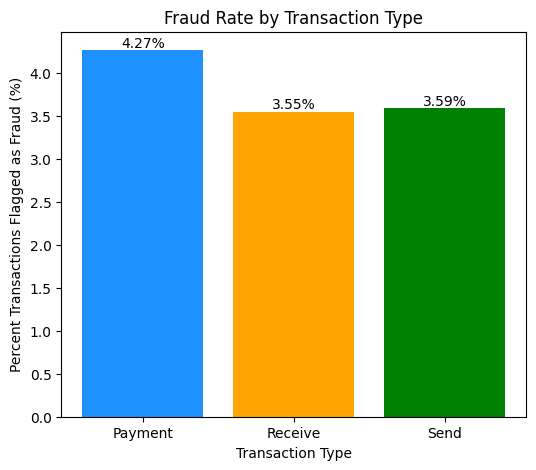

In [10]:
# Calculate fraud percentage per type
fraud_type = df.groupby('transaction_type')['is_fraud'].mean() * 100  # percent

plt.figure(figsize=(6,5))
bars = plt.bar(fraud_type.index, fraud_type.values, color=['dodgerblue', 'orange', 'green'])
plt.ylabel('Percent Transactions Flagged as Fraud (%)')
plt.xlabel('Transaction Type')
plt.title('Fraud Rate by Transaction Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}%", ha='center', va='bottom')

plt.show()


**Interpretation:**
Which transaction type is performed most often? (Look for the tallest bar!)

**Step-by-step (part 2):**
* Check fraud rate by transaction type.
* Calculate percent of transactions in each type that are flagged as fraud.

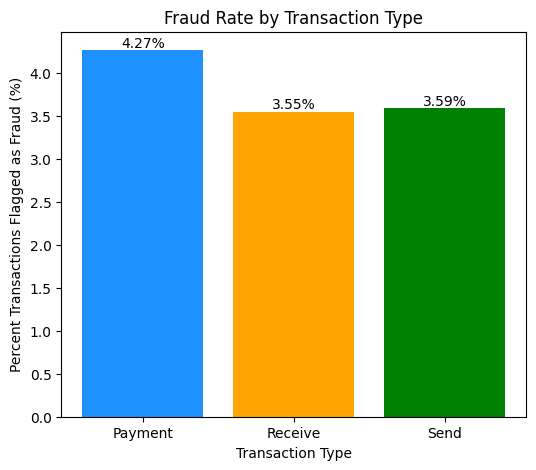

In [11]:
# Calculate fraud percentage per type
fraud_type = df.groupby('transaction_type')['is_fraud'].mean() * 100  # percent

plt.figure(figsize=(6,5))
bars = plt.bar(fraud_type.index, fraud_type.values, color=['dodgerblue', 'orange', 'green'])
plt.ylabel('Percent Transactions Flagged as Fraud (%)')
plt.xlabel('Transaction Type')
plt.title('Fraud Rate by Transaction Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}%", ha='center', va='bottom')

plt.show()


**Interpretation:**
* Is one transaction type more likely to be fraud? (Higher percent = greater risk)
* Discuss why this might be the case (e.g. 'Send' type could have more fraud attempts).

# Line Plot, Heatmap, Scatterplot Matrix/SPLOM, and Parallel Coordinate

**What we are doing:**

We simulate 500 daily commutes in Metro Manila with several fields:

* traffic_level (Low, Medium, High)
* wasted_time (minutes lost due to traffic)
* work_hour (hour the person starts work)
* transport (type of transportation: MRT, Bus, Car, E-jeep, Bike)
* is_late (1 if arrival was late)
* area (sample cities in Metro Manila)

In [21]:
import numpy as np
import pandas as pd

np.random.seed(123)
N = 500

df = pd.DataFrame({
'traffic_level': np.random.choice(['Low','Medium','High'], N, p=[0.15,0.55,0.3]),
'wasted_time': np.round(np.random.normal(
loc=45, # mean wasted time in mins
scale=15, # some variation
size=N
) + np.random.choice([0,15,30], N, p=[0.4,0.4,0.2]), 2),
'work_hour': np.random.choice(np.arange(7,11), N), # 7AM-10AM usual starting times
'transport': np.random.choice(['MRT','Bus','Car','E-jeep','Bike'], N, p=[0.25,0.35,0.28,0.07,0.05]),
'is_late': np.random.choice([0,1], N, p=[0.8,0.2]),
'area': np.random.choice(['Makati', 'QC', 'San Juan', 'Taguig', 'Manila', 'Pasig'], N)
})

df.head(10)

,traffic_level,wasted_time,work_hour,transport,is_late,area
0,Medium,52.64,10,Car,0,QC
1,Medium,40.36,9,Bus,0,San Juan
2,Medium,44.87,8,MRT,0,Manila
3,Medium,59.65,9,MRT,0,San Juan
4,High,18.73,9,Bus,0,Makati
5,Medium,35.01,8,MRT,0,Pasig
6,High,45.54,9,Bus,0,Makati
7,Medium,72.75,8,Car,0,Makati
8,Medium,50.74,8,Car,1,San Juan
9,Medium,49.88,10,Car,0,San Juan


**What do you see?** Each row is a commuter. You have their traffic experience, wasted time, work hour, mode of transport, arrival status, and city.

## Line Plot: Average Wasted Time vs Work Hour
**Purpose:**
See if leaving earlier/later means less/more wasted time due to traffic.

**Steps**
* Calculate average wasted time per work hour
* Make the line plot

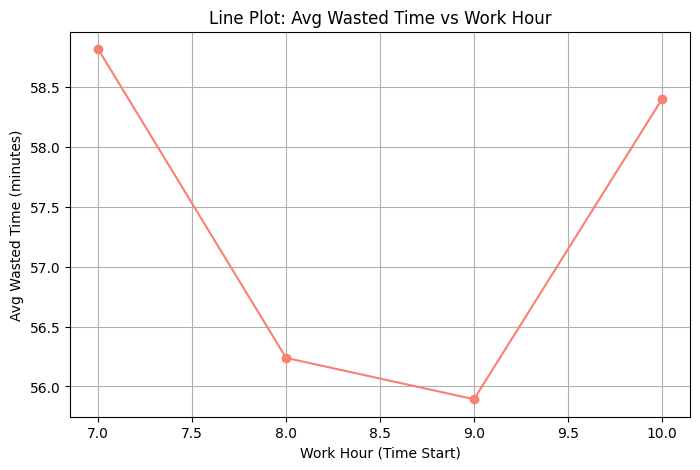

In [15]:
#Step 1: Calculate average wasted time per work hour
hourly_avg = df.groupby('work_hour')['wasted_time'].mean().sort_index()

#Step 2: Make the line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', color='salmon')
plt.xlabel('Work Hour (Time Start)')
plt.ylabel('Avg Wasted Time (minutes)')
plt.title('Line Plot: Avg Wasted Time vs Work Hour')
plt.grid(True)
plt.show()

**Insights:**

* Is there a trend? Do commutes that start later suffer more lost time?
* Are 7AM commuters losing less time than those at 9 or 10AM?
* If the line rises, later work hours may be riskier for traffic. Try to reason why (rush hour, school start, etc).

## Heatmap: Wasted Time by Transport and Traffic Level

**Purpose:**
Direct comparison across multiple categories - how does traffic affect wasted time for each transport type?

**Steps:**
* Pivot table for average wasted time
* Make the heatmap



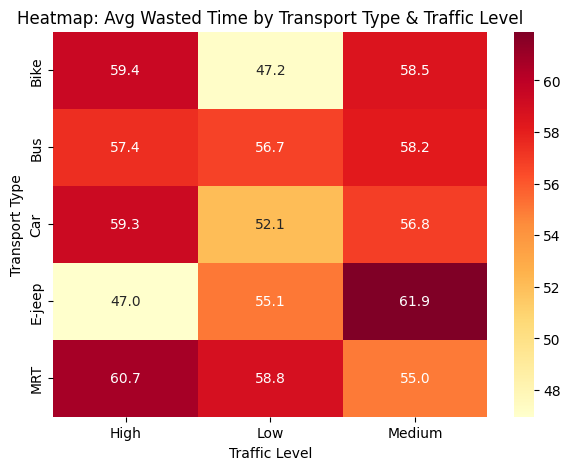

In [18]:
import seaborn as sns

# This calculates the average wasted_time for each transport + traffic level
pivot = df.pivot_table(index='transport', columns='traffic_level', values='wasted_time', aggfunc='mean')

#ow plot the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Heatmap: Avg Wasted Time by Transport Type & Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Transport Type')
plt.show()

**Insights:**
* Which transport suffers most under high traffic?
* Is MRT really immune to traffic jams, or is it affected in “high”?
* Is biking reliably faster, or does “high” traffic still hurt bikes?
* What can you suggest to commuters from this data?

## Scatterplot Matrix (SPLOM) of Numeric Variables
**Purpose:**
Check all-at-once relationships and outliers among numeric variables.

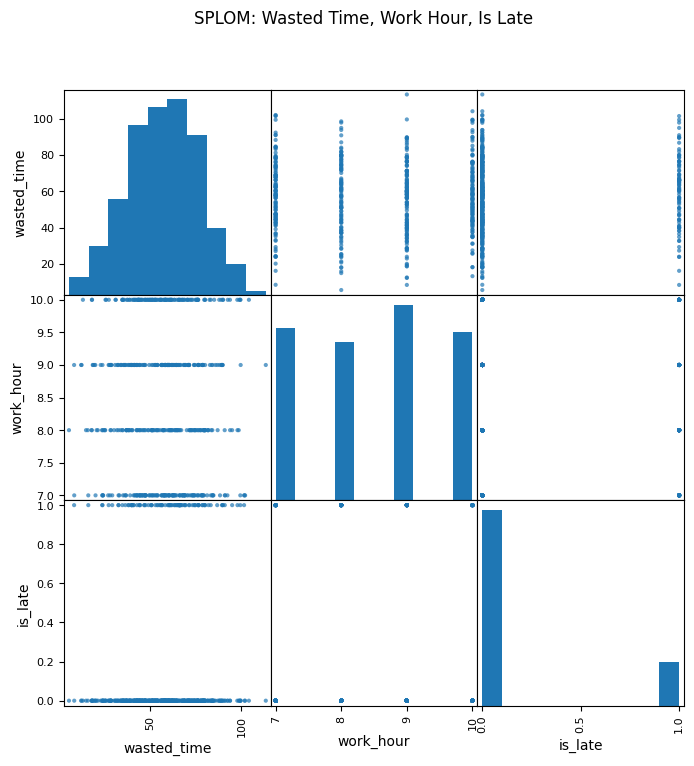

In [19]:
#Step 1: Select only numeric columns
num_cols = ['wasted_time','work_hour','is_late']

#Step 2: Make SPLOM
pd.plotting.scatter_matrix(df[num_cols], figsize=(8,8), alpha=0.7)
plt.suptitle("SPLOM: Wasted Time, Work Hour, Is Late")
plt.show()

**Insights:**
* Are higher wasted times linked to being late? (Are the “is_late=1” points higher?)
* Do early work hours consistently see lower wasted time and less lateness?
* Any surprising outliers – e.g., very high wasted time but still not late?

## Parallel Coordinates: Compare Multiple Features by Lateness
**Purpose:**
See patterns across multiple variables for those who arrive on time vs. late.

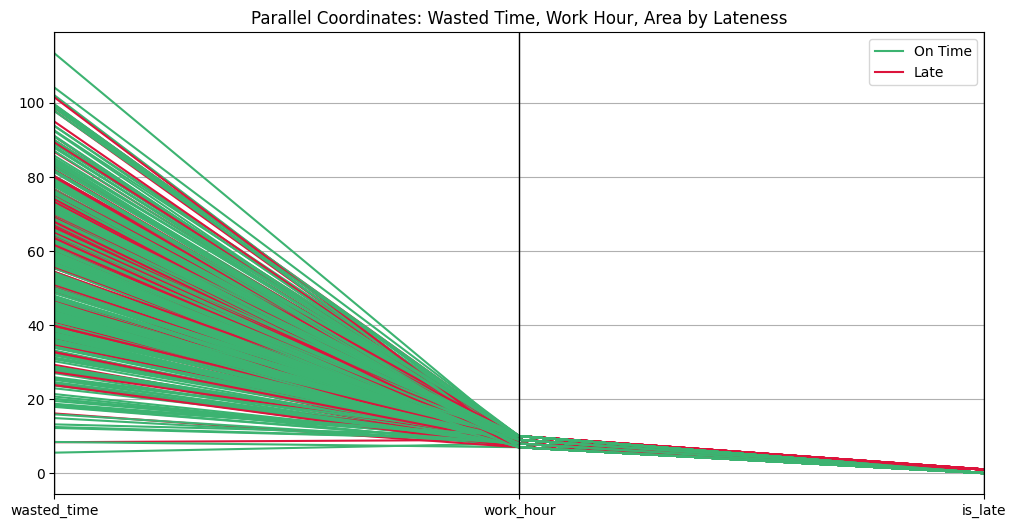

In [24]:
#Step 1: Prepare data
pc_df = df[['wasted_time','work_hour','is_late']].copy()
pc_df['Late_Label'] = pc_df['is_late'].map({0:'On Time',1:'Late'})

#Step 2: Plot
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,6))
parallel_coordinates(pc_df, 'Late_Label', color=['mediumseagreen','crimson'])
plt.title('Parallel Coordinates: Wasted Time, Work Hour by Lateness')
plt.show()

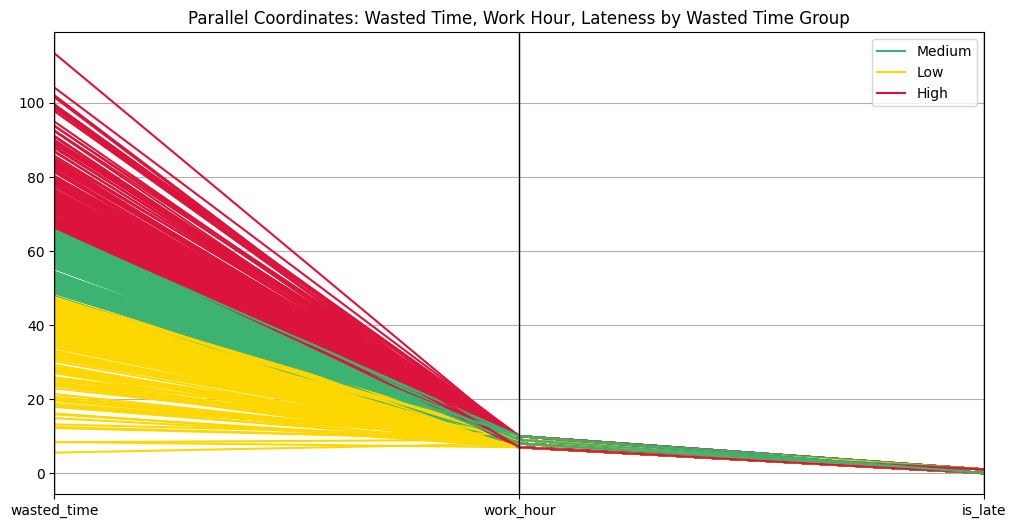

In [25]:
# Categorize wasted_time into Low, Medium, High (using quantiles for even groups)
bins = pd.qcut(df['wasted_time'], q=3, labels=['Low','Medium','High'])
pc_df = df[['wasted_time','work_hour','is_late']].copy()
pc_df['WastedTimeGroup'] = bins

from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
parallel_coordinates(pc_df, 'WastedTimeGroup', color=['mediumseagreen','gold','crimson'])
plt.title('Parallel Coordinates: Wasted Time, Work Hour, Lateness by Wasted Time Group')
plt.show()


# Interactive Data Visualization with Plotly

**Introduction**
Plotly is a Python library for interactive visualizations.
Below, we use a simulated financial transactions dataset and demonstrate interactive versions of scatter, bar, line, heatmap, and parallel coordinates plots.

**Data Preparation**
First, we'll create the dataset for all our visualizations.

**What is happening:**
We generate 500 rows, each representing a transaction, with fields for fraud, user demographics, transaction info, and metro traffic.

In [26]:
import numpy as np
import pandas as pd
np.random.seed(1234)
N = 500

df = pd.DataFrame({
'transaction_id': np.arange(1, N+1),
'amount': np.round(np.random.exponential(scale=2000, size=N), 2),
'transaction_type': np.random.choice(['Send', 'Receive', 'Payment'], N),
'is_fraud': np.random.choice([0,1], N, p=[0.96, 0.04]),
'user_age': np.random.randint(18, 65, N),
'user_region': np.random.choice(['NCR', 'Luzon', 'Visayas', 'Mindanao'], N, p=[0.5,0.2,0.15,0.15]),
'day_of_week': np.random.choice(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], N),
'hour': np.random.randint(0,24, N),
'traffic_level': np.random.choice(['Low','Medium','High'], N, p=[0.2,0.5,0.3])
})

df.head()

,transaction_id,amount,transaction_type,is_fraud,user_age,user_region,day_of_week,hour,traffic_level
0,1,425.20,Receive,0,63,Visayas,Wed,15,High
1,2,1946.30,Receive,0,33,NCR,Mon,2,Medium
2,3,1151.54,Payment,0,58,Luzon,Thu,13,Medium
3,4,3077.57,Receive,0,60,NCR,Mon,7,Medium
4,5,3028.04,Receive,0,62,Luzon,Thu,6,High


## Import Plotly

In [27]:
import plotly.express as px

## Interactive Scatter Plot
**What is happening:**
We plot user age vs amount, color-coded by fraud, with transaction info on hover.

In [28]:
fig = px.scatter(
df,
x='user_age',
y='amount',
color=df['is_fraud'].map({0:"Normal",1:"Fraud"}),
hover_data=['transaction_id','transaction_type','user_region','traffic_level','hour'],
title="Interactive Scatter Plot: Transaction Amount vs User Age"
)
fig.show()

**How to interpret:**

* Red dots = fraudulent transactions.
* Are frauds at specific ages or amounts?

Hover over points to explore patterns: does fraud vary by region/type?

## Interactive Bar Chart
**What is happening:**
Visualize transaction counts by region.

In [29]:
region_counts = df['user_region'].value_counts()
fig = px.bar(
x=region_counts.index,
y=region_counts.values,
labels={'x':'Region','y':'Number of Transactions'},
title="Interactive Bar Chart: Transactions per Region"
)
fig.show()

**How to interpret:**

* Which region is busiest?
* Are region counts proportional to population or other expected values?

## Interactive Line Plot
**What is happening:**
Show average transaction amount by hour of day.

In [30]:
hourly_avg = df.groupby('hour')['amount'].mean()
fig = px.line(
x=hourly_avg.index,
y=hourly_avg.values,
markers=True,
labels={'x':'Hour of Day','y':'Avg Transaction Amount'},
title="Interactive Line Plot: Avg Transaction Amount by Hour"
)
fig.show()

**How to interpret:**

* What are peak hours for highest transaction amounts?
* Do late night or early morning transactions differ?

## Interactive Heatmap
**What is happening:**
Show how transaction amounts vary by hour and traffic level.

In [31]:
heatmap_data = df.pivot_table(
index='hour', columns='traffic_level', values='amount', aggfunc='mean'
)

fig = px.imshow(
heatmap_data,
labels=dict(x="Traffic Level", y="Hour", color="Avg Transaction Amount"),
title="Interactive Heatmap: Hour vs Traffic Level"
)
fig.show()

**How to interpret:**

* Which traffic level has the highest average transaction at each hour?
* Are certain hours more active in terms of transaction amount when traffic is high?

## Interactive Parallel Coordinates
**What is happening:**
Shows multiple numeric dimensions per transaction, colored by fraud.

In [32]:
fig = px.parallel_coordinates(
df,
dimensions=['amount','user_age','hour'],
color="is_fraud",
color_continuous_scale=px.colors.diverging.RdYlBu,
title="Interactive Parallel Coordinates: Transaction Features by Fraud Flag"
)
fig.show()

**How to interpret:**

* Are frauds distinguished by patterns across amount, age, and hour?
* Is there a typical fraud profile/reflected by line crossings?

# Analysis: Applying Good Charts Principles

**Principles Recap**

Berinato’s rules (from the article):
* Have a specific point; know your story
* Eliminate chart-junk: Focus on clarity
* Highlight what matters
* Guide your viewer’s attention
* Build comparisons
* Design with purpose—think audience

We’ll show these using 4 visualizations.

**Refference:** [Basic Rules of Visual Analytics: Inspired by Scott Berinato’s Good Charts](https://medium.com/@ligaoke/basic-rules-of-visual-analytics-inspired-by-scott-berinatos-good-charts-e1c4a7b38861)

## 1. Highlighting Outliers and Trends: Transaction Amount vs User Age
**Principle:** Highlight what matters, Guide the viewer

We want to show how fraudulent transactions stand apart by amount and age.

In [34]:
import plotly.express as px

fig = px.scatter(
    df, x='user_age', y='amount',
    color=df['is_fraud'].map({0:'Normal', 1:'Fraud'}),
    symbol=df['is_fraud'].map({0:'circle', 1:'star'}),
    hover_data=['transaction_type','hour','user_region'],
    labels={'user_age':'User Age', 'amount':'Transaction Amount (PHP)'},
    title='Fraudulent Transactions Stand Out: Amount vs Age'
)
fig.add_shape(
    type='rect', x0=50, x1=65, y0=5000, y1=15000,
    line=dict(color='red', width=3, dash='dash'), fillcolor='rgba(255,0,0,0.1)'
)
fig.show()


**Why this works**

* Fraud points are both colored and symbolized, immediately visible.
* The title clarifies the point.
* Annotations or shapes can guide the eye to the region with most fraud risk (e.g., older users & higher amounts).
* Hover info supports further discovery.

##2. Regional Comparison: Avg Transaction Amount by Region, Bar Chart
**Principle:** Build comparison, Design with purpose

Bar chart allows the viewer to compare regions clearly. We annotate the outlier region.

In [35]:
region_amount = df.groupby('user_region')['amount'].mean().sort_values()
fig = px.bar(
    region_amount,
    title='Average Transaction Amount by Region: NCR Leads',
    labels={'index':'Region', 'value':'Avg Amount (PHP)'},
    text_auto='.2f',
    color=region_amount,
    color_continuous_scale='Viridis'
)

fig.add_annotation(
    x='NCR', y=region_amount['NCR'],
    text="Metro Manila's average is highest!", showarrow=True, arrowhead=3,
    font=dict(size=16, color="black"), ax=40, ay=-40
)
fig.update_traces(marker_line_width=2)
fig.show()


**Why this works**

* Bars make comparison easy (one region = one bar).
* Color scale focuses attention on large values.
* Annotation provides context—what’s most important.
* Axis titles and chart titles are direct and informative.

## 3. Line Plot - Avg Amount by Hour (“Show the Trend & Peak”)
**Principle:** Show the right signal, Eliminate chart-junk

Here, we reveal HOW transaction amounts change across hours, annotate the peak.

In [36]:
hourly_avg = df.groupby('hour')['amount'].mean()
fig = px.line(
    x=hourly_avg.index,
    y=hourly_avg.values,
    markers=True,
    labels={'x':'Hour of Day','y':'Avg Amount (PHP)'},
    title='Transactions Peak Near 7PM - Watch High-Value Times!'
)
max_hour = hourly_avg.idxmax()
fig.add_annotation(
    x=max_hour, y=hourly_avg[max_hour],
    text="Peak transacted amount!",
    showarrow=True, arrowhead=2
)
fig.update_traces(line=dict(width=4))
fig.show()


**Why this works**

* Minimalist, focused on the key message: trend and peak.
* Clearly shows when is “prime time” for transaction value.
* Annotation guides the eye and supports understanding.

##4. Parallel Coordinates: Comparing Multiple Fraud Patterns
**Principle: **Reveal the multidimensional story, eliminate chart-junk

Parallel coordinates show differences across key features between fraud and normal transactions.

In [37]:
fig = px.parallel_coordinates(
    df,
    dimensions=['amount','user_age','hour'],
    color="is_fraud",
    color_continuous_scale=px.colors.sequential.Reds,
    labels={'is_fraud':'Fraud'},
    title="Are Fraudulent Transactions Different? A Multidimensional View"
)
fig.update_layout(coloraxis_colorbar_title='Fraud Flag')
fig.show()


**Why this works**

* Multiple comparison across key variables (amount, age, hour).
* Color immediately highlights fraudulent transactions’ path.
* No distractions: axes all properly labeled, clean layout.
* Supports viewer in comparing how normal and fraud transactions differ.

# Final Thoughts

## Summary:
* Every visualization here eliminates unnecessary clutter and makes the main insight clearly visible (no “chart-junk”).
* Colors, symbols, annotations, and design all guide the viewer's attention to the key story.
* Titles and labels tell the audience exactly why the visualization matters and what to look for.
* Comparison is always straightforward, and supplementary info is discoverable (via hover or annotation).

Berinato’s principles = clarify purpose, focus on story, guide your reader, enable purposeful comparison.

Use your visualizations as teaching tools, not just pictures!